Loading dataset...
Loaded 16724 data points.
Generating basic statistics...
          longitude      latitude      altitude  \
count  16724.000000  16724.000000  16724.000000   
mean       5.600538     41.863913  31404.504784   
min       -0.012000     34.295000  27333.000000   
25%        4.566000     40.106000  29800.000000   
50%        5.723000     41.450000  29980.000000   
75%        7.003250     43.058500  30673.000000   
max       14.968000     53.867000  39009.000000   
std        2.010290      2.526204   3136.042856   

                                time    tau_cirrus  tau_contrail  \
count                          16724  16724.000000  16724.000000   
mean   2024-02-27 07:35:47.536474624      0.288606      0.245485   
min              2024-01-04 05:30:00      0.000000      0.000100   
25%              2024-02-28 17:00:00      0.031500      0.074400   
50%              2024-02-28 20:00:00      0.114900      0.163400   
75%              2024-02-28 22:00:00      0.345225      

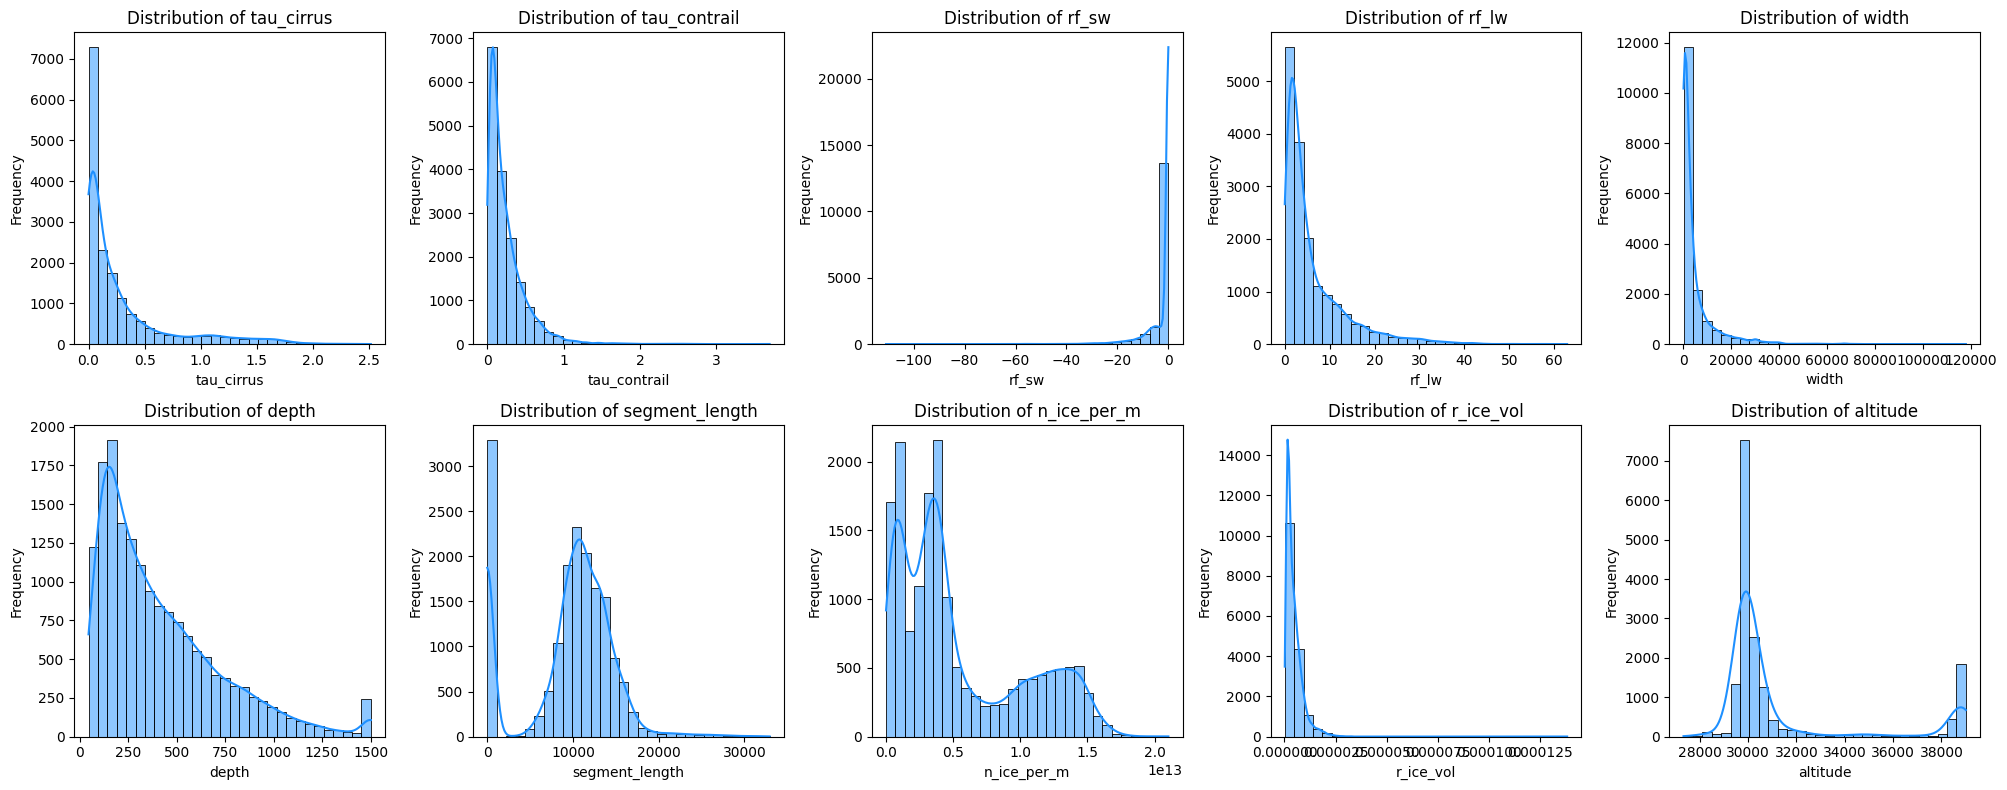

Distribution plots saved.


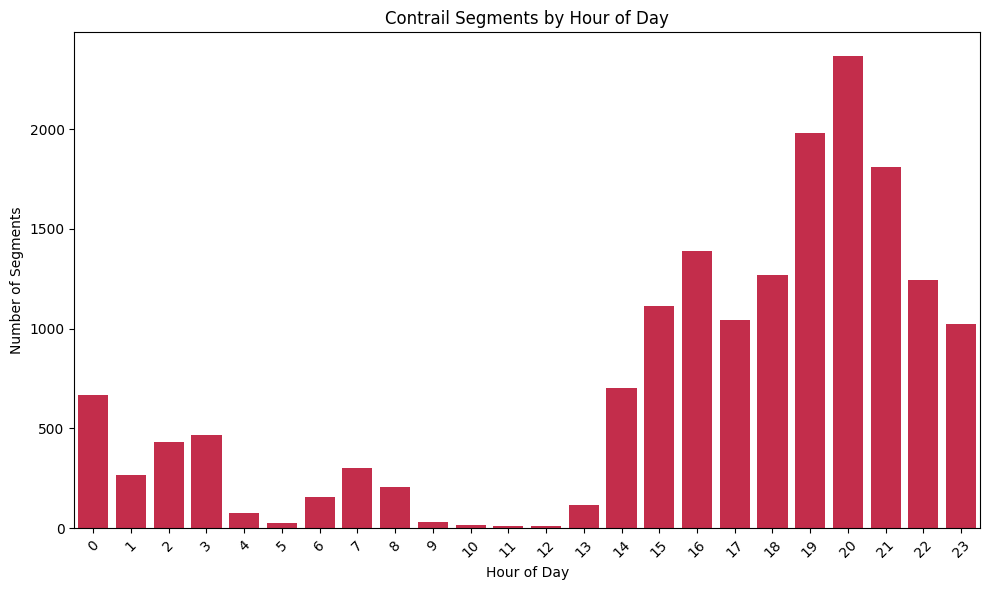

Temporal patterns plot saved.


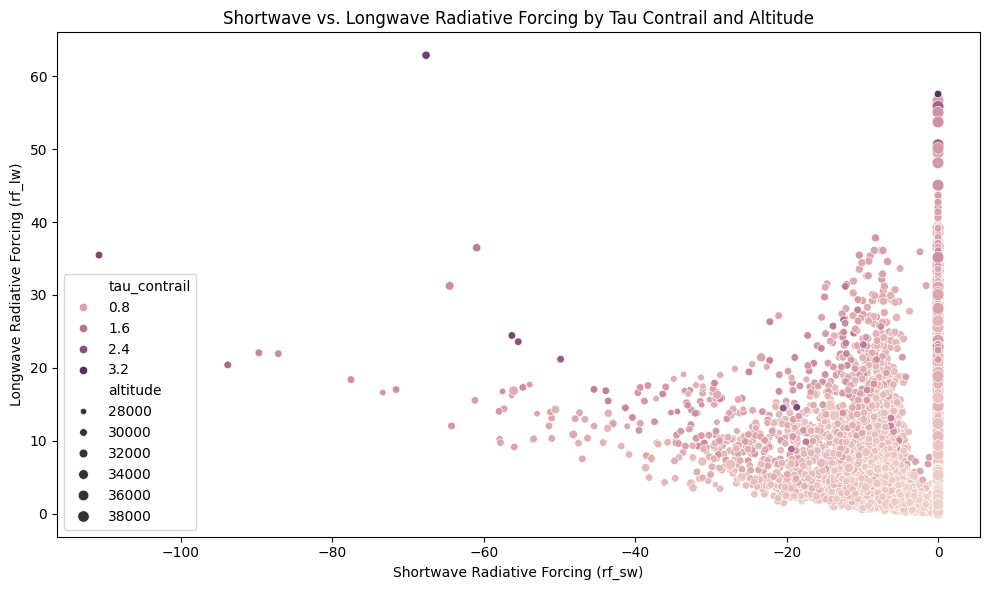

Radiative forcing relationships plot saved.


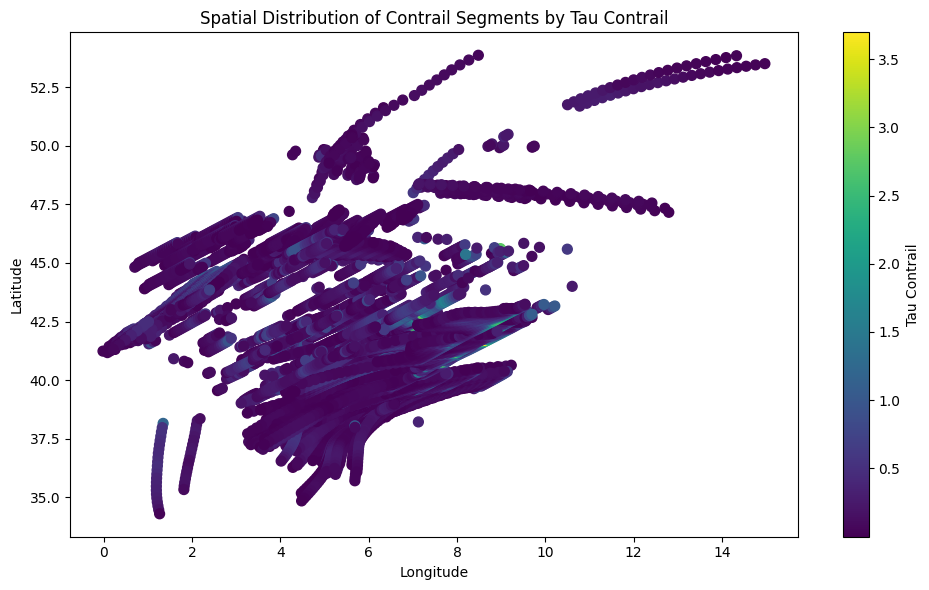

Spatial distribution plot saved.
EDA completed.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuration dictionary
CONFIG = {
    'input_file': '../data/contrail_predictions_synthetic.csv',
    'output_dir': '../data/eda_plots'
}


def ensure_directory(config):
    os.makedirs(config['output_dir'], exist_ok=True)


def load_data(config):
    print("Loading dataset...")
    df = pd.read_csv(config['input_file'], parse_dates=[
                     'time', 'origin_timestamp'])
    print(f"Loaded {len(df)} data points.")
    return df


def plot_distributions(df, config):
    numerical_cols = ['tau_cirrus', 'tau_contrail', 'rf_sw', 'rf_lw', 'width',
                      'depth', 'segment_length', 'n_ice_per_m', 'r_ice_vol', 'altitude']
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    axes = axes.flatten()

    for i, col in enumerate(numerical_cols):
        sns.histplot(df[col], bins=30, kde=True,
                     ax=axes[i], color='dodgerblue')
        axes[i].set_title(f'Distribution of {col}', fontsize=12)
        axes[i].set_xlabel(col, fontsize=10)
        axes[i].set_ylabel('Frequency', fontsize=10)

    plt.tight_layout()
    plt.savefig(os.path.join(
        config['output_dir'], 'contrail_distributions.png'))
    plt.show()
    print("Distribution plots saved.")


def plot_temporal_patterns(df, config):
    df['hour'] = df['time'].dt.hour
    plt.figure(figsize=(10, 6))
    sns.countplot(x='hour', data=df, color='crimson')
    plt.title('Contrail Segments by Hour of Day', fontsize=12)
    plt.xlabel('Hour of Day', fontsize=10)
    plt.ylabel('Number of Segments', fontsize=10)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(os.path.join(config['output_dir'],
                'contrail_temporal_patterns.png'))
    plt.show()
    print("Temporal patterns plot saved.")


def plot_rf_relationships(df, config):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='rf_sw', y='rf_lw', hue='tau_contrail',
                    size='altitude', data=df)
    plt.title(
        'Shortwave vs. Longwave Radiative Forcing by Tau Contrail and Altitude', fontsize=12)
    plt.xlabel('Shortwave Radiative Forcing (rf_sw)', fontsize=10)
    plt.ylabel('Longwave Radiative Forcing (rf_lw)', fontsize=10)
    plt.tight_layout()
    plt.savefig(os.path.join(config['output_dir'], 'rf_relationships.png'))
    plt.show()
    print("Radiative forcing relationships plot saved.")


def plot_spatial_distribution(df, config):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['longitude'], df['latitude'],
                c=df['tau_contrail'], cmap='viridis', s=50)
    plt.colorbar(label='Tau Contrail')
    plt.title(
        'Spatial Distribution of Contrail Segments by Tau Contrail', fontsize=12)
    plt.xlabel('Longitude', fontsize=10)
    plt.ylabel('Latitude', fontsize=10)
    plt.tight_layout()
    plt.savefig(os.path.join(config['output_dir'],
                'contrail_spatial_distribution.png'))
    plt.show()
    print("Spatial distribution plot saved.")


def perform_eda(config):
    ensure_directory(config)
    df = load_data(config)

    print("Generating basic statistics...")
    print(df.describe())

    plot_distributions(df, config)
    plot_temporal_patterns(df, config)
    plot_rf_relationships(df, config)
    plot_spatial_distribution(df, config)

    print("EDA completed.")


if __name__ == "__main__":
    perform_eda(CONFIG)